

# Sentimen Aplikasi RuangGuru

In [1]:
import pandas as pd
import string
from sklearn.pipeline import Pipeline
import numpy as np

In [2]:
df_review = pd.read_csv("/content/scrapped_data.csv")
df_test = df_review
df_review.head(5)

,userName,score,at,content
0,Muhammad Taufik Septiyano,5,2024-04-03 03:42:36,"Ruang guru best deh,kalo ada masalah cepet ban..."
1,Ari vernando,5,2024-04-03 01:03:55,"Bagus banget untuk belajar utbk, aku diberi te..."
2,Marwinto Sinaga,2,2024-04-02 09:05:14,Bagus sekali
3,Imel Nptpl,5,2024-04-02 08:53:50,"bagus, sangat membantu dalam pembelajaran saya"
4,Sevtia Hapsari,1,2024-04-02 00:05:52,Gabisa buat drill soal


In [3]:
df_as = pd.read_csv("/content/scrapped_data.csv")

## Menampilkan Grafik Frekuensi Rating

In [4]:
df_as['score'].value_counts()

score
5    760
1    159
4     77
3     62
2     44
Name: count, dtype: int64

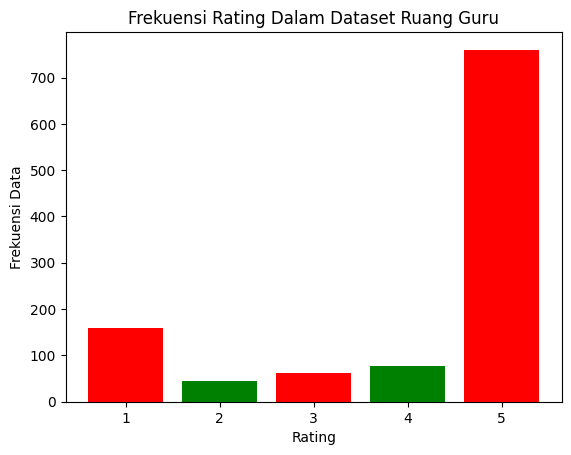

In [5]:
import matplotlib.pyplot as plt

# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]

# heights of bars
height = [159, 44, 62, 77, 760]

# labels for bars
tick_label = [1, 2, 3, 4, 5]

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('Rating')
# naming the y-axis
plt.ylabel('Frekuensi Data')
# plot title
plt.title('Frekuensi Rating Dalam Dataset Ruang Guru')

# function to show the plot
plt.show()

## Pelabelan Berdasarkan Rating

In [6]:
sentimen = []
for index, row in df_review.iterrows():
     if row['score']>=3:
        sentimen.append('positif')
     else:
       sentimen.append('negatif')
df_review['sentimen'] = sentimen
df_review = df_review.drop(columns=['score'])
df_review.head()

,userName,at,content,sentimen
0,Muhammad Taufik Septiyano,2024-04-03 03:42:36,"Ruang guru best deh,kalo ada masalah cepet ban...",positif
1,Ari vernando,2024-04-03 01:03:55,"Bagus banget untuk belajar utbk, aku diberi te...",positif
2,Marwinto Sinaga,2024-04-02 09:05:14,Bagus sekali,negatif
3,Imel Nptpl,2024-04-02 08:53:50,"bagus, sangat membantu dalam pembelajaran saya",positif
4,Sevtia Hapsari,2024-04-02 00:05:52,Gabisa buat drill soal,negatif


In [7]:
df_review['sentimen'].value_counts()

sentimen
positif    899
negatif    203
Name: count, dtype: int64

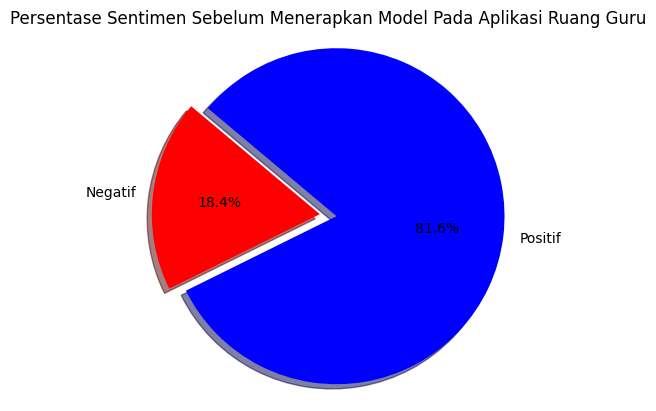

Negatif = 203
Positif = 899
Jumlah Keseluruhan Data = 1102


In [8]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Negatif', 'Positif'
sizes = [203, 899]
colors = ['red', 'blue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Persentase Sentimen Sebelum Menerapkan Model Pada Aplikasi Ruang Guru")
plt.show()
print("Negatif =",sizes[0])
print("Positif =",sizes[1])
print("Jumlah Keseluruhan Data =",sum(sizes))

### Menghilangkan Kolom yang Tidak Digunakan

In [9]:
df_preprocessed = df_review.copy()
df_preprocessed = df_preprocessed.drop (columns=['userName', 'at'])
df_preprocessed.head()

,content,sentimen
0,"Ruang guru best deh,kalo ada masalah cepet ban...",positif
1,"Bagus banget untuk belajar utbk, aku diberi te...",positif
2,Bagus sekali,negatif
3,"bagus, sangat membantu dalam pembelajaran saya",positif
4,Gabisa buat drill soal,negatif


## Cleansing

In [10]:
import string, re

def cleansing(data):
  #lower text
  data = data.lower()

  #hapus punctuation
  remove =string.punctuation
  translator = str.maketrans(remove,' '*len(remove))
  data = data.translate(translator)

  #remove ASCII dan unicode
  data = data.encode('ascii','ignore').decode('utf-8')
  data = re.sub(r'[^\x00-\x7f]',r'', data)

  #remove newline
  data = data.replace('\n','')

  return data



In [11]:
#jalankan cleansing data
review =[]
for index, row in df_preprocessed.iterrows():
    review.append(cleansing(row["content"]))

df_preprocessed["content"] = review
df_preprocessed.head()


,content,sentimen
0,ruang guru best deh kalo ada masalah cepet ban...,positif
1,bagus banget untuk belajar utbk aku diberi te...,positif
2,bagus sekali,negatif
3,bagus sangat membantu dalam pembelajaran saya,positif
4,gabisa buat drill soal,negatif


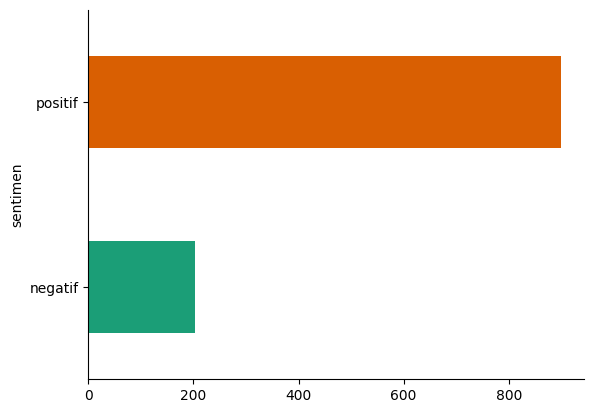

In [12]:
# @title Menampilkan Sentimen

from matplotlib import pyplot as plt
import seaborn as sns
df_preprocessed.groupby('sentimen').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [13]:
df_as['content'].iloc[5]

'Pelajaran bahasa ingris kelas 6 SD'

In [14]:
df_as['content'].iloc[110]

'Harus bayar aku pertama mau nonton pelajaran tapi di stop adehhĥhh bagiku gak seru belajar dengan aplikasi ini'

In [15]:
text = df_as['content'].iloc[110]
print(cleansing(text))

harus bayar aku pertama mau nonton pelajaran tapi di stop adehhhh bagiku gak seru belajar dengan aplikasi ini


## Remove Stopword

In [16]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.0 MB/s eta 0:00:00


In [17]:
# import libary
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

#contoh
kalimat ='Bagus banget untuk belajar utbk, aku diberi teman aku akun untuk belajar utbk karena dia sudah lulus snbp aku berterimakasih se banyak banyaknya kepada-nya karena penjelasan dan cara cara yang diajarkan oleh ruang guru mudah aku fahami dan semoga aku mendapat skor utbk 700+ di saat utbk nanti di tanggal 30 April 2024, btw nama teman ku Nayla Ramadhani Putri Marly dia diterima di universitas Andalas jurusan keperawatan, semoga segala hal yang dia impikan dipermudah oleh Allah SWT'
stop = stopword.remove(kalimat)
print(stop)


Bagus banget belajar utbk, aku diberi teman aku akun belajar utbk lulus snbp aku berterimakasih se banyak banyaknya kepada-nya penjelasan cara cara diajarkan ruang guru mudah aku fahami semoga aku mendapat skor utbk 700+ saat utbk tanggal 30 April 2024, btw nama teman ku Nayla Ramadhani Putri Marly diterima di universitas Andalas jurusan keperawatan, semoga segala yang dia impikan dipermudah Allah SWT


In [19]:
text = df_as['content'].iloc[67]
txt = cleansing(text)
text2 = stopword.remove(txt)
print("Awal : ",text)
print("Cleansing : ",txt)
print("Stopword : ", text2)

Awal :  Drill soalnya ga bisa discroll, jadinya saya ga bisa lihat soalnya. Hanya sebagian teks yg terlihat.
Cleansing :  drill soalnya ga bisa discroll  jadinya saya ga bisa lihat soalnya  hanya sebagian teks yg terlihat 
Stopword :  drill soalnya ga discroll  jadinya ga lihat soalnya  sebagian teks yg terlihat 


In [20]:
review = []
for index, row in df_preprocessed.iterrows():
     review.append(stopword.remove(row["content"]))

df_preprocessed["content"] = review
df_preprocessed.head()

,content,sentimen
0,ruang guru best deh kalo masalah cepet banget ...,positif
1,bagus banget belajar utbk aku diberi teman ak...,positif
2,bagus sekali,negatif
3,bagus sangat membantu pembelajaran,positif
4,gabisa buat drill soal,negatif


## Stemming

In [21]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
Stemmer = factory.create_stemmer()
#contoh
kalimat = 'Bagus banget untuk belajar utbk, aku diberi teman aku akun untuk belajar utbk karena dia sudah lulus snbp aku berterimakasih se banyak banyaknya kepada-nya karena penjelasan dan cara cara yang diajarkan oleh ruang guru mudah aku fahami dan semoga aku mendapat skor utbk 700+ di saat utbk nanti di tanggal 30 April 2024, btw nama teman ku Nayla Ramadhani Putri Marly dia diterima di universitas Andalas jurusan keperawatan, semoga segala hal yang dia impikan dipermudah oleh Allah SWT'
katadasar = Stemmer.stem(kalimat)
print(katadasar)

bagus banget untuk ajar utbk aku beri teman aku akun untuk ajar utbk karena dia sudah lulus snbp aku berterimakasih se banyak banyak kepada karena jelas dan cara cara yang ajar oleh ruang guru mudah aku fahami dan moga aku dapat skor utbk 700 di saat utbk nanti di tanggal 30 april 2024 btw nama teman ku nayla ramadhani putri marly dia terima di universitas andalas jurus awat moga segala hal yang dia impi mudah oleh allah swt


In [28]:
text = df_as['content'].iloc[78]
txt = cleansing(text)
text2 = stopword.remove(txt)
text3 = Stemmer.stem(text2)
print("Awal : ",text)
print("Cleansing : ",txt)
print("Stopword : ", text2)
print("Stemming : ", text3)

Awal :  Kecepatan 22 Mbps, tapi gak bisa klaim voucher, udah 5 menitan muter² aja. Untung belum terlanjur langganan.
Cleansing :  kecepatan 22 mbps  tapi gak bisa klaim voucher  udah 5 menitan muter aja  untung belum terlanjur langganan 
Stopword :  kecepatan 22 mbps  gak klaim voucher  udah 5 menitan muter aja  untung terlanjur langganan 
Stemming :  cepat 22 mbps gak klaim voucher udah 5 menit muter aja untung lanjur langgan


In [29]:
#implementasi pada data kita
review = []
for index, row in df_preprocessed.iterrows():
     review.append(Stemmer.stem(row["content"]))

df_preprocessed["content"] = review
df_preprocessed.head()

,content,sentimen
0,ruang guru best deh kalo masalah cepet banget ...,positif
1,bagus banget ajar utbk aku beri teman aku akun...,positif
2,bagus sekali,negatif
3,bagus sangat bantu ajar,positif
4,gabisa buat drill soal,negatif


In [30]:
df_preprocessed.to_excel("ruangGuru.xlsx", index = False)

In [31]:
def preprocess_data(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  # count vectorizer
  #data = vectorizer.transform([data])
  return data

In [32]:
text = df_as['content'].iloc[234]
print("text asli : ",text)
print("text prepocess : ",preprocess_data(text))

text asli :  I have alerted the horse
text prepocess :  i have alerted the horse


## Split Dataset into Train and Test

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(df_preprocessed['content'],df_preprocessed['sentimen'],
                                                   test_size=0.2, stratify=df_preprocessed['sentimen'], random_state=0)

## Pembobotan TF-ID

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

TfidfVectorizer()

In [35]:
kamus = vectorizer.vocabulary_
kamus["aku"]

80

In [36]:
def preprocess_data2(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  vector = []
  kalimat = data.split()
  for i in kalimat:
    vec = kamus.get(i)
    vector.append(vec)
  return vector

In [37]:
def preprocess_data3(data):
  # cleansing data
  data = cleansing(data)

  #hapus stopwords
  factory = StopWordRemoverFactory()
  stopword = factory.create_stop_word_remover()
  data = stopword.remove(data)

  #steming
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  data = Stemmer.stem(data)

  # count vectorizer
  data = vectorizer.transform([data])
  return data

In [38]:
data = "suka ruang guru"
print(preprocess_data3(data))

  (0, 1687)	0.6942934349316359
  (0, 1495)	0.5121106522962923
  (0, 637)	0.5056671889845101


In [39]:
data = "suka ruang guru"
print(preprocess_data2(data))

[1687, 1495, 637]


In [40]:
df_as = df_as.astype({"content":str})

In [41]:
df_as.dtypes

userName    object
score        int64
at          object
content     object
dtype: object

In [42]:
df_as['content'][0]

'Ruang guru best deh,kalo ada masalah cepet banget ditanggapi,jd ngak nyesel udah langganan 😍😍'

In [43]:
df_as['pembobotan'] = ""
for j in range(0,len(df_as['content'])):
  df_as['pembobotan'][j] = preprocess_data2(df_as['content'][j])

Streaming output truncated to the last 5000 lines.
<ipython-input-43-9a1ff4c01065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_as['pembobotan'][j] = preprocess_data2(df_as['content'][j])
<ipython-input-43-9a1ff4c01065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_as['pembobotan'][j] = preprocess_data2(df_as['content'][j])
<ipython-input-43-9a1ff4c01065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_as['pembobotan']

In [44]:
df_as.head()

,userName,score,at,content,pembobotan
0,Muhammad Taufik Septiyano,5,2024-04-03 03:42:36,"Ruang guru best deh,kalo ada masalah cepet ban...","[1495, 637, 269, 427, 828, 1082, 362, 207, 171..."
1,Ari vernando,5,2024-04-03 01:03:55,"Bagus banget untuk belajar utbk, aku diberi te...","[187, 207, 69, 1891, 80, 261, 1755, 80, 81, 69..."
2,Marwinto Sinaga,2,2024-04-02 09:05:14,Bagus sekali,"[187, 1565]"
3,Imel Nptpl,5,2024-04-02 08:53:50,"bagus, sangat membantu dalam pembelajaran saya","[187, 1525, 216, 69]"
4,Sevtia Hapsari,1,2024-04-02 00:05:52,Gabisa buat drill soal,"[577, 324, 499, 1659]"


### Memberikan Hasil Sentimen

In [45]:
sentimen = []
for index, row in df_as.iterrows():
     if row['score']>=3:
        sentimen.append('positif')
     else:
       sentimen.append('negatif')
df_as['sentimen'] = sentimen
df_as.head()

,userName,score,at,content,pembobotan,sentimen
0,Muhammad Taufik Septiyano,5,2024-04-03 03:42:36,"Ruang guru best deh,kalo ada masalah cepet ban...","[1495, 637, 269, 427, 828, 1082, 362, 207, 171...",positif
1,Ari vernando,5,2024-04-03 01:03:55,"Bagus banget untuk belajar utbk, aku diberi te...","[187, 207, 69, 1891, 80, 261, 1755, 80, 81, 69...",positif
2,Marwinto Sinaga,2,2024-04-02 09:05:14,Bagus sekali,"[187, 1565]",negatif
3,Imel Nptpl,5,2024-04-02 08:53:50,"bagus, sangat membantu dalam pembelajaran saya","[187, 1525, 216, 69]",positif
4,Sevtia Hapsari,1,2024-04-02 00:05:52,Gabisa buat drill soal,"[577, 324, 499, 1659]",negatif


#### Menyimpan File Hasil Pembobotan TF-IDF

In [46]:
df_as.to_excel(r'/content/RuangGuruPembobotan.xlsx', index = False)

### Menampilkan Hasil Pembobotan TF-IDF

In [40]:
# import matplotlib.pyplot as plt

# # x-coordinates of left sides of bars
# left = [1, 2, 3, 4, 5,6,7,8]

# # heights of bars
# height = [316, 1348, 1931, 1093, 1357,167,185,344]

# # labels for bars
# tick_label = ["buka", "padahal", "tulis", "masuk", "paket","bagus","banget","cara"]

# # plotting a bar chart
# plt.bar(left, height, tick_label = tick_label,
#         width = 0.8, color = ['red', 'orange','blue'])

# # naming the x-axis
# plt.xlabel('Kata')
# # naming the y-axis
# plt.ylabel('Hasil Pembobotan')
# # plot title
# plt.title('Hasil Pembobotan TF-IDF')

# # function to show the plot
# plt.show()

### Memberubah Data Training dan Test ke Data Vektor Matriks Menggunakan  Pembobotan TF-IDF



In [47]:
#pada data kita
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test).todense()

print(x_test.shape)
print(x_test.shape)

(221, 1977)
(221, 1977)


In [48]:
count_array = x_train.toarray()
dfa = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())

In [49]:
print(x_train[0])

  (0, 637)	0.4835142906134282
  (0, 1495)	0.4896754706546854
  (0, 207)	0.5678838963581605
  (0, 187)	0.45159688270489623


## Preproses Data Dengan SVM

In [50]:
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

svm = LinearSVC()
svm.fit(x_train, y_train)

LinearSVC()

### Menampilkan Akurasi

In [51]:
y_test

456    negatif
239    positif
669    positif
160    negatif
617    positif
        ...   
933    negatif
574    positif
917    positif
825    positif
441    positif
Name: sentimen, Length: 221, dtype: object

In [52]:
x_test

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.57219867, 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [53]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(np.asarray(x_test))))

Accuracy score model final: 0.8280542986425339 


## Lakukan Prediksi Terhadap Seluruh Dataset Ruang Guru

In [54]:
dfRG = pd.read_csv("/content/scrapped_data.csv")
dfRG

,userName,score,at,content
0,Muhammad Taufik Septiyano,5,2024-04-03 03:42:36,"Ruang guru best deh,kalo ada masalah cepet ban..."
1,Ari vernando,5,2024-04-03 01:03:55,"Bagus banget untuk belajar utbk, aku diberi te..."
2,Marwinto Sinaga,2,2024-04-02 09:05:14,Bagus sekali
3,Imel Nptpl,5,2024-04-02 08:53:50,"bagus, sangat membantu dalam pembelajaran saya"
4,Sevtia Hapsari,1,2024-04-02 00:05:52,Gabisa buat drill soal
...,...,...,...,...
1097,Pengguna Google,5,2019-07-17 13:55:10,best la ruang guru ni tapi tolong tambah bahas...
1098,Pengguna Google,5,2019-07-17 11:39:17,Terbaik lah 👍
1099,Pengguna Google,5,2019-07-17 05:47:42,sngat2 hebat aplikasi ini membuat rakyat menja...
1100,Pengguna Google,5,2019-07-15 04:34:07,sangt mnyenang kn dn mmbuwt kit cpt memahaminx...


In [55]:
dfRG['content'] = dfRG['content'].astype(str)

In [56]:
prediction = []
for i in range(0,len(dfRG['content'])):
  predict_transform = vectorizer.transform([dfRG['content'][i]])
  prediction.append(svm.predict(predict_transform))

In [57]:
dfRG['predict'] = prediction

In [58]:
dfRG['predict'].value_counts()

predict
[positif]    947
[negatif]    155
Name: count, dtype: int64

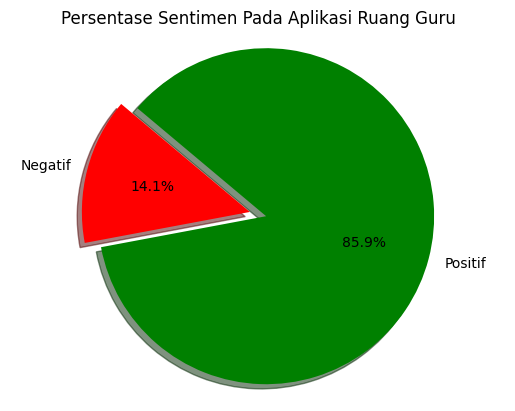

Negatif = 155
Positif = 947
Jumlah Keseluruhan Data = 1102


In [60]:
import matplotlib.pyplot as plt

# Data to plot
labels = 'Negatif', 'Positif'
sizes = [155, 947]
colors = ['red', 'green']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Persentase Sentimen Pada Aplikasi Ruang Guru")
plt.show()
print("Negatif =",sizes[0])
print("Positif =",sizes[1])
print("Jumlah Keseluruhan Data =",sum(sizes))

In [61]:
dfRG.to_excel("ruangGuruPredict.xlsx", index = False)

## Evaluasi Model SVM

Evaluasi dan menampilkan confussion matrix untuk menghitung evaluasi

In [62]:
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = svm.predict(np.asarray(x_test))
print('Accuracy of SVM classifier on test set : {:.2f}'.format(svm.score(np.asarray(x_test), y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of SVM classifier on test set : 0.83
[[ 15  26]
 [ 12 168]]
              precision    recall  f1-score   support

     negatif       0.56      0.37      0.44        41
     positif       0.87      0.93      0.90       180

    accuracy                           0.83       221
   macro avg       0.71      0.65      0.67       221
weighted avg       0.81      0.83      0.81       221



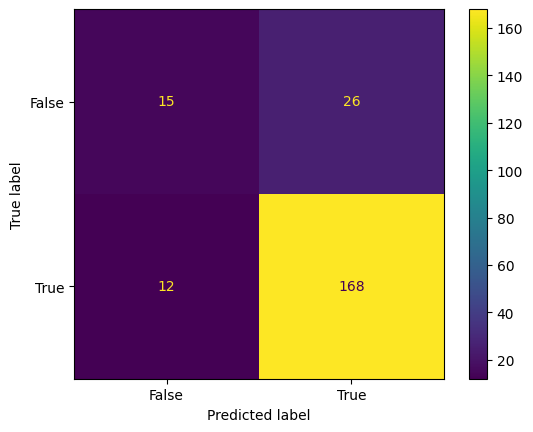

In [63]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()